In [1]:
import requests

In [2]:
# base url for NCEI-NOAA API
base_url = 'https://www.ncei.noaa.gov/access/services/data/v1'

In [3]:
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')

In [4]:
today

'2019-07-10'

In [5]:
# set up request for API
req = requests.get(
    base_url,
    params={
        "dataset": "daily-summaries",
        "stations": "USC00144559", # Lawrence, Kansas
        "startDate": "1970-01-01", 
        "endDate": today, # always pull data up to today
        "dataTypes": "PRCP,SNOW,SNWD,TMAX,TMIN", # PRCP (tenths of mm), SNOW and SNWD (mm), TMAX/MIN (tenths of C)
        "format": "json",
    }
)

In [6]:
dic = req.json()

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(dic)

In [9]:
df.rename(columns={'DATE':'Date'}, inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17754 entries, 0 to 17753
Data columns (total 7 columns):
Date       17754 non-null datetime64[ns]
PRCP       17582 non-null object
SNOW       16249 non-null object
SNWD       15976 non-null object
STATION    17754 non-null object
TMAX       17148 non-null object
TMIN       17143 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 971.0+ KB


In [12]:
#df.fillna(method='pad', inplace=True) # placeholder to be able to do some EDA --> will return to this later
#df.info()

In [13]:
# convert all measurement columns to numeric type
for col in ['PRCP','SNOW','SNWD','TMAX','TMIN']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17754 entries, 0 to 17753
Data columns (total 7 columns):
Date       17754 non-null datetime64[ns]
PRCP       17582 non-null float64
SNOW       16249 non-null float64
SNWD       15976 non-null float64
STATION    17754 non-null object
TMAX       17148 non-null float64
TMIN       17143 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 971.0+ KB


In [15]:
df.set_index('Date', inplace=True)

In [16]:
import pandas_profiling

In [17]:
pandas_profiling.ProfileReport(df)

Number of variables,7
Number of observations,17754
Total Missing (%),3.3%
Total size in memory,971.0 KiB
Average record size in memory,56.0 B
Numeric,4
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,2


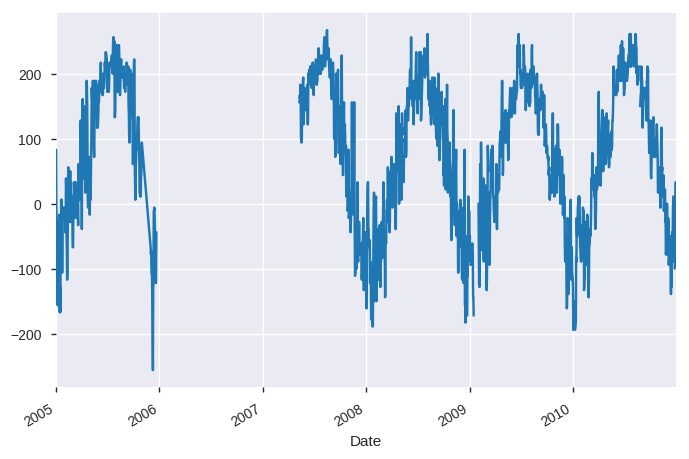

In [18]:
df['2005':'2010']['TMIN'].plot();

In [21]:
test = df['TMIN'].interpolate(method='spline', order=4)

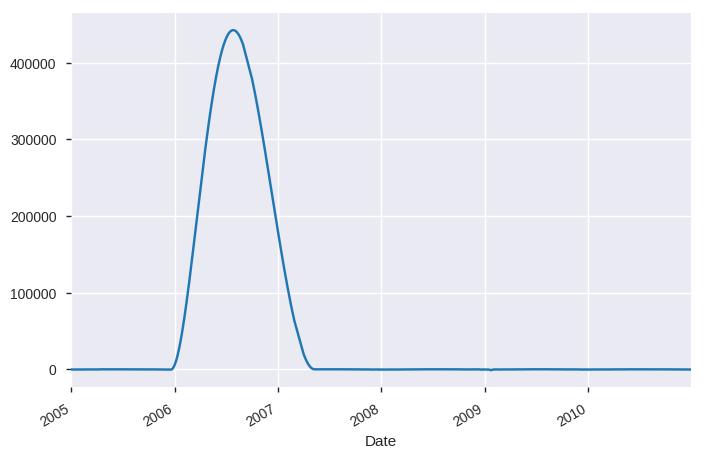

In [22]:
test['2005':'2010'].plot();

In [23]:
df.to_csv(f'../data/kansas_daily_asof_{today}')

In [24]:
# test import

In [31]:
weather = pd.read_csv('../data/kansas_daily_asof_2019-07-10', parse_dates=['Date'])

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17754 entries, 0 to 17753
Data columns (total 7 columns):
Date       17754 non-null datetime64[ns]
PRCP       17582 non-null float64
SNOW       16249 non-null float64
SNWD       15976 non-null float64
STATION    17754 non-null object
TMAX       17148 non-null float64
TMIN       17143 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 971.0+ KB


**Note**: Weirdness here from missing data in 2006 and 2007. Given the strong seasonality and predictability of the series. I believe it makes more sense to interpolate than to carry the last observation forward.

# Notes

Need to: 
* clean the data - convert to numeric; index by data (convert to datetime)
* figure out which stations to get
* write a script to get and preprocess all weather data